In [1]:
def round_complex(z, digits):
    if z.imag_part():
        return round(z.real_part(), digits) + round(z.imag_part(), digits) * I
    return round(z, digits)

# Another rabbits and foxes model: 

$R = \text{number of rabbits}$, $F = \text{number of foxes}$
$$ \begin{cases}
    R' = 0.3R - 0.01R^2 - 0.04RF \\
    F' = 0.01RF - 0.1F
\end{cases} $$


In [2]:
vectorfield(R,F) = (0.3*R - 0.01*R^2 - 0.04*R*F, 0.01*R*F - 0.1*F)
(R0, F0) = (10, 5)


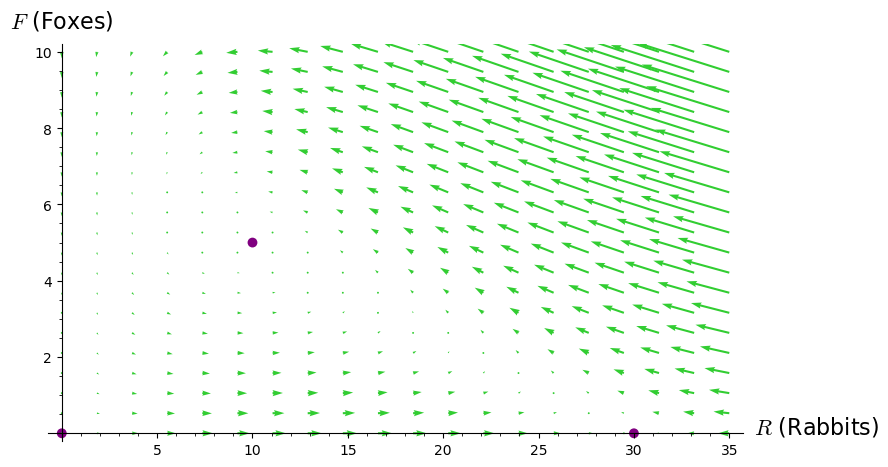

In [3]:
aspect_ratio = 2
p = plot_vector_field(vectorfield, (R, 0, 35), (F, 0, 10), color="limegreen", frame=False, axes=True)
for eqpt in (0,0), (30,0), (10,5):
    p += point(eqpt, size=50, color="purple")
p.show(aspect_ratio=aspect_ratio, axes_labels=("$R$ (Rabbits)", "$F$ (Foxes)"), figsize=9)


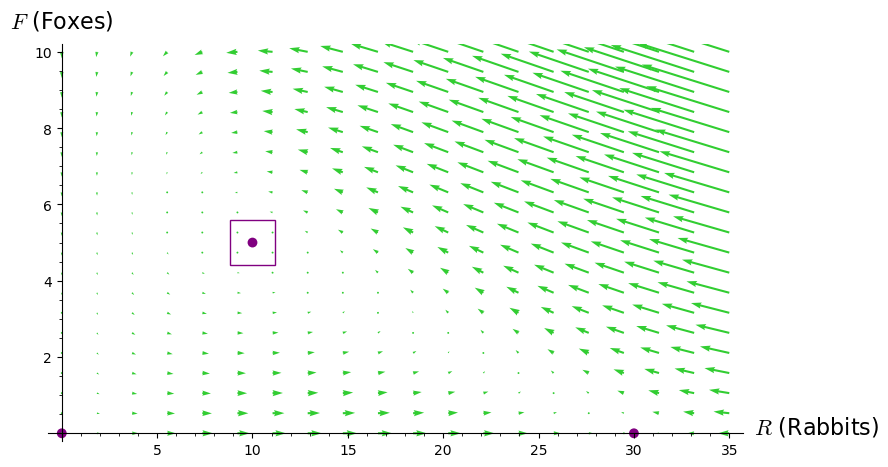

In [4]:
size = 1.2
dx, dy = size, size/aspect_ratio
p += polygon([(R0-dx, F0-dy), (R0+dx, F0-dy), (R0+dx, F0+dy), (R0-dx, F0+dy)], color="purple", fill=False)
p.show(aspect_ratio=aspect_ratio, axes_labels=("$R$ (Rabbits)", "$F$ (Foxes)"), figsize=9)

J \vert_{(10,5)} = \left(\begin{array}{rr}
-0.1 & -0.4 \\
0.05 & 0.0
\end{array}\right)

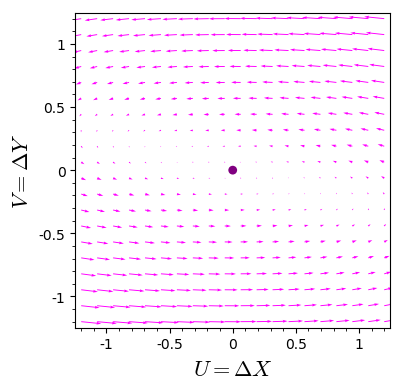

In [5]:
J = jacobian(vectorfield, (R, F))(R0, F0)
show(r"J \vert_{(10,5)} = " + latex(matrix(RDF, J).round(5)))
p = plot_vector_field(J*vector((R, F)), (R, -size, size), (F, -size, size), color="fuchsia")
p += point((0,0), size=40, color="purple")
p.show(aspect_ratio=1, axes=False, axes_labels=(r"$U = \Delta X$", r"$V = \Delta Y$"))

In [6]:
J = matrix(RDF, jacobian(vectorfield, (R, F))(R0, F0))
linearapprox(R, F) = tuple(J*vector((R - R0, F - F0)))
aspect_ratio = 2
choices = {"Actual vector field": 1, "Vector field of linear approx.": 2, "Both": 3}
@interact(size=slider([RDF(a) for a in (0.1, 0.5, 1, 5, 10, 20)], default=RDF(0.1), label="Size"), 
          which=selector(choices, buttons=True))
def linearapprox_interactive(size, which):
    dx, dy = size, size/aspect_ratio
    p = point((R0, F0), size=40, color="purple")
    if (which & 1):
        p += plot_vector_field(vectorfield, (R, R0-dx, R0+dx), (F, F0-dy, F0+dy), color="limegreen")
    if (which & 2):
        p += plot_vector_field(linearapprox, (R, R0-dx, R0+dx), (F, F0-dy, F0+dy), color="fuchsia")
    p.show(aspect_ratio=aspect_ratio, axes_labels=("$R$", "$F$"), 
           xmin=R0-dx, xmax=R0+dx, ymin=F0-dy, ymax=F0+dy)


Interactive function <function linearapprox_interactive at 0x7f60764ab488> with 2 widgets
  size: SelectionSli…

In [7]:
for evalue in J.eigenvalues():
    show(round_complex(evalue, 5))

-0.05 + 0.13229*I

-0.05 - 0.13229*I